In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML
from sklearn import metrics

boston=load_boston()

pd.pandas.set_option('display.max_columns',None)

In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
standardscaler=preprocessing.StandardScaler()
features_scaled=standardscaler.fit_transform(features)
features_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [11]:
target=pd.DataFrame(boston.target, columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [12]:
standardscaler=preprocessing.StandardScaler()
target_scaled=standardscaler.fit_transform(target)
target_scaled

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288],
       [ 0.6712218 ],
       [ 0.03996443],
       [ 0.49708184],
       [-0.65659542],
       [-0.39538548],
       [-0.81985164],
       [-0.39538548],
       [-0.09064054],
       [-0.23212926],
       [-0.47157171],
       [-0.286548  ],
       [ 0.06173193],
       [-0.54775795],
       [-0.25389676],
       [-0.47157171],
       [-0.97222411],
       [-0.31919924],
       [-0.79808414],
       [-0.87427038],
       [-0.75454915],
       [-0.93957286],
       [-0.64571167],
       [-0.84161913],
       [-0.44980422],
       [-0.16682677],
       [-1.07017784],
       [-0.87427038],
       [-1.0157591 ],
       [-1.02664285],
       [-0.98310786],
       [-0.39538548],
       [-0.27566425],
       [-0.16682677],
       [ 0.23587189],
       [ 0.89978051],
       [ 1.34601416],
       [ 0.4426631 ],
       [ 0.30117438],
       [ 0.23587189],
       [-0.14505928],
       [-0

In [13]:
df=pd.concat([features,target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


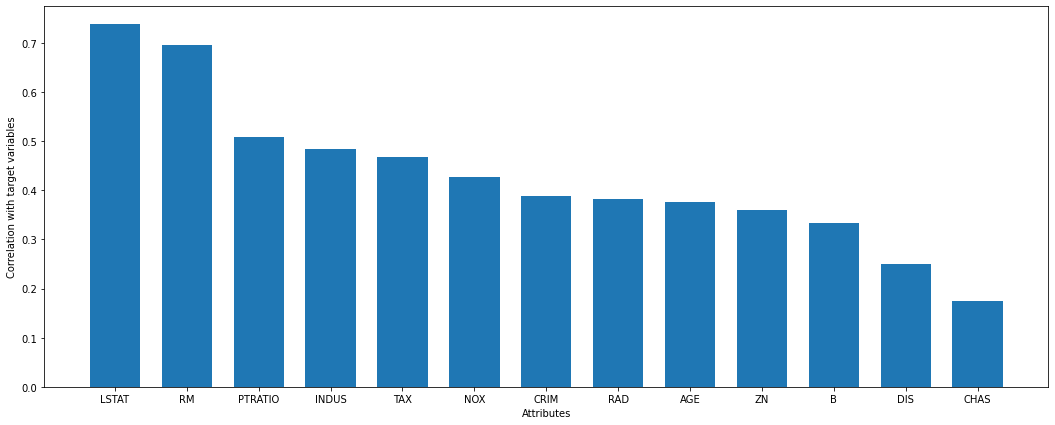

In [24]:
corr=df.corr('pearson')
corrs=[abs(corr[attr]['target'])for attr in list (features)]
l=list(zip(corrs,list(features)))
l.sort(key=lambda x : x[0], reverse=True)
corrs, labels=list(zip ((*l)))
index = np.arange(len(labels))
plt.figure(figsize=(18,7))
plt.bar(index,corrs,width=0.7)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variables')
plt.xticks(index,labels)
plt.show()

In [25]:
X=df['LSTAT'].values
Y=df['target'].values
Y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [26]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:, -1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:, -1]

In [27]:
Y[:5]

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333])

In [29]:
xtrain, xtest,ytrain,ytest=train_test_split(X, Y, test_size=0.2)
xtrain=xtrain.reshape(-1,1)
ytrain=ytrain.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.coef_

array([[-0.77922788]])

In [33]:
predictions=lm.predict(xtest)

Text(0, 0.5, 'Predictions')

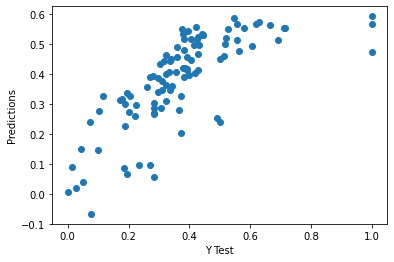

In [34]:
plt.scatter(ytest,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [37]:
print('MSE: ', metrics.mean_squared_error(ytest,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(ytest,predictions)))

MSE:  0.016633983428297035
RMSE:  0.12897280111828632


In [38]:
p=pd.DataFrame(list(zip(xtest, ytest, predictions)),columns=['x', 'target_y', 'predictions'])
p

,x,target_y,predictions
0,[0.46854304635761584],[0.22000000000000003],[0.26192478128086355]
1,[0.5444260485651213],[0.3711111111111111],[0.20279463020181748]
2,[0.3595474613686534],[0.3355555555555556],[0.34685718010349337]
3,[0.6807395143487858],[0.27111111111111114],[0.09657537699073104]
4,[0.15728476821192053],[0.42444444444444446],[0.5044659100705507]
...,...,...,...
97,[0.6167218543046358],[0.09999999999999999],[0.14645972262832624]
98,[0.49779249448123614],[0.07333333333333335],[0.23913279577403124]
99,[0.23123620309050769],[0.40444444444444444],[0.4468408901098804]
100,[0.2828366445916115],[0.35555555555555557],[0.40663238737612895]


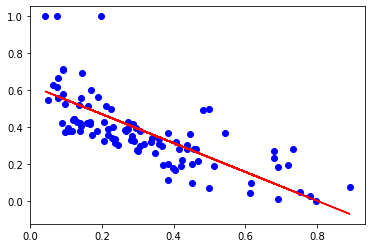

In [39]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest,predictions,color='r')

In [43]:
predictions=predictions.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)
xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predictions_scaled=y_scaler.inverse_transform(predictions)

xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predictions_scaled=predictions_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled, predictions_scaled)), columns=['x', 'target_y', 'predictions'])
p=p.round(decimals=2)
p

,x,target_y,predictions
0,18.71,14.9,16.79
1,21.46,21.7,14.13
2,14.76,20.1,20.61
3,26.40,17.2,9.35
4,7.43,24.1,27.70
...,...,...,...
97,24.08,9.5,11.59
98,19.77,8.3,15.76
99,10.11,23.2,25.11
100,11.98,21.0,23.30
